In [2]:
# import the necessary libraries and functions
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from plots_functions import (
    plot_activation_sensitivity,
    plot_llm_prediction_accuracy,
    plot_activation_sensitivity_heatmap,
    plot_activation_sensitivity_3d,
)

In [3]:
# define the filepath
file_path = os.path.join('data', 'results', 'llm_predictions_results.csv')
print(file_path)

# load the dataframe
df = pd.read_csv(file_path)
df.head()

data/results/llm_predictions_results.csv


,sequence,time,dot_value,distance_value,dot_counts,distance_counts,model_overall_accuracy,precision,recall,llm_activation_sensitivity,llm_interaction_accuracy,Tp,Fp,Fp_out,Fp_in,Fn,Total_ground_truths,Total_llm_predictions,Total_llm_activations,Total_correspondances
0,Apartment_release_clean_seq150_M1292,2,0.9,2,15,15,0.217,0.217,0.714,0.304,0.714,5,18,16,2,0,7,23,22,7
1,Apartment_release_clean_seq150_M1292,2,0.9,2,15,30,0.200,0.200,0.571,0.350,0.571,4,16,13,3,0,7,20,19,7
2,Apartment_release_clean_seq150_M1292,2,0.9,2,15,45,0.278,0.278,0.714,0.389,0.714,5,13,11,2,0,7,18,17,7
3,Apartment_release_clean_seq150_M1292,2,0.9,2,15,60,0.353,0.353,0.857,0.412,0.857,6,11,10,1,0,7,17,16,7
4,Apartment_release_clean_seq150_M1292,2,0.9,2,30,15,0.182,0.182,0.571,0.318,0.571,4,18,15,3,0,7,22,21,7


In [4]:
# Assuming your DataFrame is named df
df = df.drop(df.columns[[0]], axis=1)
df.head()

,time,dot_value,distance_value,dot_counts,distance_counts,model_overall_accuracy,precision,recall,llm_activation_sensitivity,llm_interaction_accuracy,Tp,Fp,Fp_out,Fp_in,Fn,Total_ground_truths,Total_llm_predictions,Total_llm_activations,Total_correspondances
0,2,0.9,2,15,15,0.217,0.217,0.714,0.304,0.714,5,18,16,2,0,7,23,22,7
1,2,0.9,2,15,30,0.200,0.200,0.571,0.350,0.571,4,16,13,3,0,7,20,19,7
2,2,0.9,2,15,45,0.278,0.278,0.714,0.389,0.714,5,13,11,2,0,7,18,17,7
3,2,0.9,2,15,60,0.353,0.353,0.857,0.412,0.857,6,11,10,1,0,7,17,16,7
4,2,0.9,2,30,15,0.182,0.182,0.571,0.318,0.571,4,18,15,3,0,7,22,21,7


In [5]:
import os
print(os.getcwd())

/Users/petrospolydorou/thesis/Documents/projectaria_sandbox/projectaria_tools/projects/AriaDigitalTwinDatasetTools/object_anticipation/adt


In [6]:
df.tail()

,time,dot_value,distance_value,dot_counts,distance_counts,model_overall_accuracy,precision,recall,llm_activation_sensitivity,llm_interaction_accuracy,Tp,Fp,Fp_out,Fp_in,Fn,Total_ground_truths,Total_llm_predictions,Total_llm_activations,Total_correspondances
29,2,0.9,2,80,80,0.143,0.154,0.286,0.462,0.333,2,11,7,4,1,7,13,12,6
30,2,0.9,2,80,90,0.154,0.167,0.286,0.500,0.333,2,10,6,4,1,7,12,11,6
31,2,0.9,2,90,70,0.077,0.083,0.143,0.455,0.200,1,11,7,4,2,7,11,11,5
32,2,0.9,2,90,80,0.077,0.083,0.143,0.455,0.200,1,11,7,4,2,7,11,11,5
33,2,0.9,2,90,90,0.083,0.091,0.143,0.500,0.200,1,10,6,4,2,7,10,10,5


# Line Plots of Performance Metrics vs. Parameter Values

Model Overall Accuracy vs. dot_counts

*Purpose*: Show how changing the dot_counts parameter affects the model_overall_accuracy.

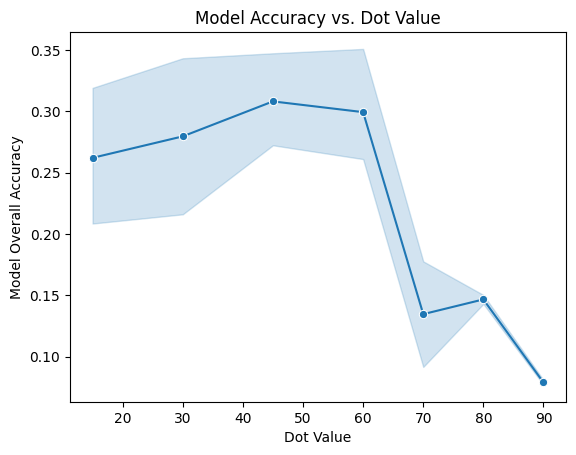

In [7]:
# Line Plots of Performance Metrics vs. Parameter Values
sns.lineplot(data=df, x='dot_counts', y='model_overall_accuracy', marker='o')
plt.title('Model Accuracy vs. Dot Value')
plt.xlabel('Dot Value')
plt.ylabel('Model Overall Accuracy')
plt.show()


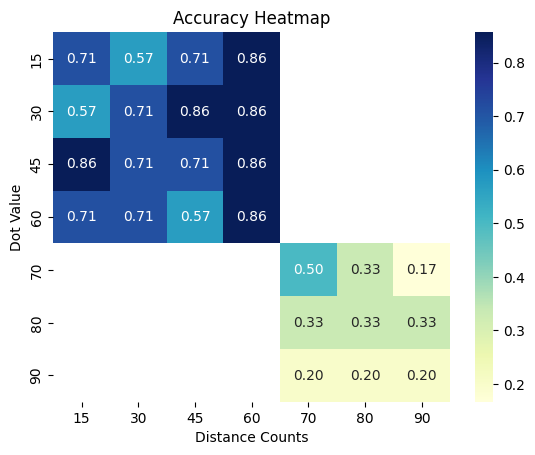

In [30]:
pivot_table = df.pivot_table(
    index='dot_counts',
    columns='distance_counts',
    values= 'llm_interaction_accuracy',
    aggfunc='mean'  # or another aggregation function as needed
)

# Plot the heatmap
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Accuracy Heatmap')
plt.xlabel('Distance Counts')
plt.ylabel('Dot Value')
plt.show()

# Heatmap to Show Interactions Between Parameters and Performance

Accuracy Heatmap with dot_counts and distance_counts

*Purpose*: Visualize how combinations of dot_counts and distance_counts affect model_overall_accuracy.

We are using Pivot table because it does not require unique combination. 

Otherwise Pivot needs to ensure that each combination of dot_value and distance_counts is unique. 

In our case, we have combinations of the same dot_value and distance counts with different model_accuracy_value so we don't have unique combinations.

so we use pivot_table with aggregated function the mean

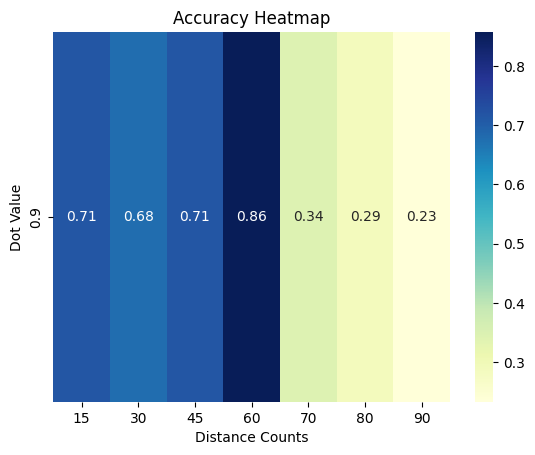

In [21]:
pivot_table = df.pivot_table(
    index='dot_value',
    columns='distance_counts',
    values='llm_interaction_accuracy',
    aggfunc='mean'  # or another aggregation function as needed
)

# Plot the heatmap
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Accuracy Heatmap')
plt.xlabel('Distance Counts')
plt.ylabel('Dot Value')
plt.show()

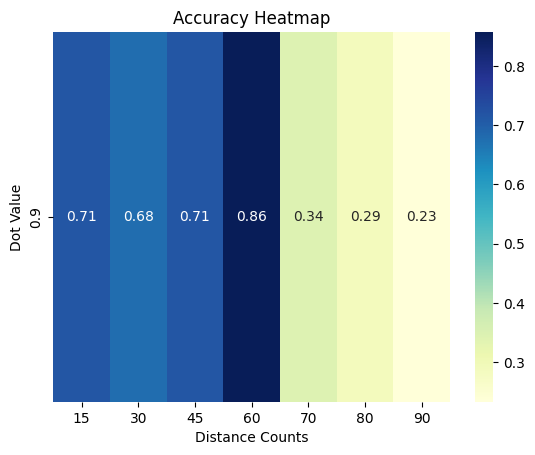

In [27]:
pivot_table = df.pivot_table(
    index='dot_value',
    columns='distance_counts',
    values='llm_interaction_accuracy',
    aggfunc='mean'  # or another aggregation function as needed
)

# Plot the heatmap
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Accuracy Heatmap')
plt.xlabel('Distance Counts')
plt.ylabel('Dot Value')
plt.show()

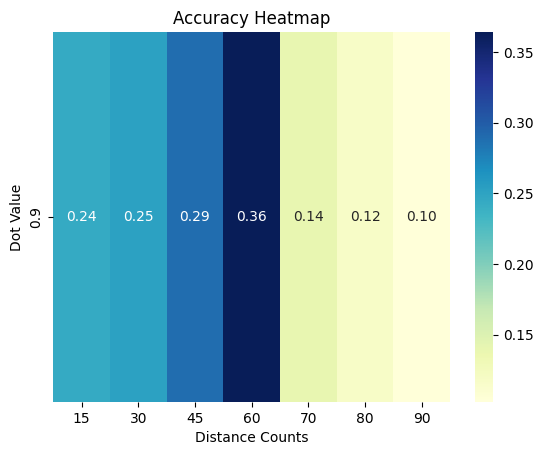

In [22]:
pivot_table = df.pivot_table(
    index='dot_value',
    columns='distance_counts',
    values='model_overall_accuracy',
    aggfunc='mean'  # or another aggregation function as needed
)

# Plot the heatmap
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Accuracy Heatmap')
plt.xlabel('Distance Counts')
plt.ylabel('Dot Value')
plt.show()

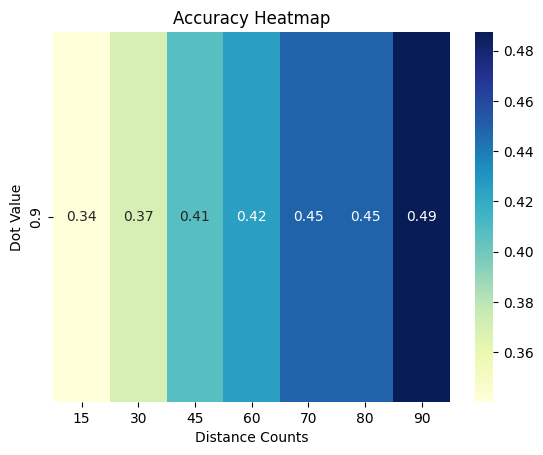

In [23]:


pivot_table = df.pivot_table(
    index='dot_value',
    columns='distance_counts',
    values='llm_activation_sensitivity',
    aggfunc='mean'  # or another aggregation function as needed
)

# Plot the heatmap
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('LLM Sensitivity Heatmap')
plt.xlabel('Distance Counts')
plt.ylabel('Dot Value')
plt.show()

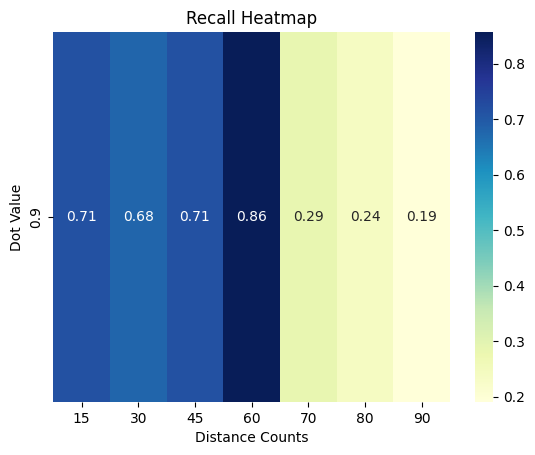

In [25]:
pivot_table = df.pivot_table(
    index='dot_value',
    columns='distance_counts',
    values='recall',
    aggfunc='mean'  # or another aggregation function as needed
)

# Plot the heatmap
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Recall Heatmap')
plt.xlabel('Distance Counts')
plt.ylabel('Dot Value')
plt.show()

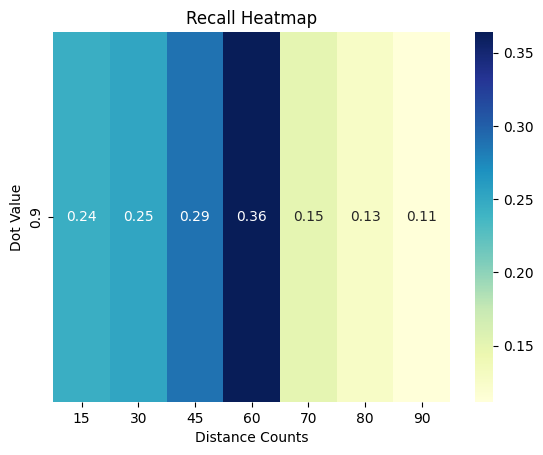

In [26]:
pivot_table = df.pivot_table(
    index='dot_value',
    columns='distance_counts',
    values='precision',
    aggfunc='mean'  # or another aggregation function as needed
)

# Plot the heatmap
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Recall Heatmap')
plt.xlabel('Distance Counts')
plt.ylabel('Dot Value')
plt.show()

# Bar Charts for True Positives, False Positives, and False Negatives

Grouped Bar Chart of Tp, Fp, and Fn vs. distance_counts

*Purpose*: Highlight how the counts of true positives, false positives, and false negatives change with distance_counts.

['time', 'dot_value', 'distance_value', 'dot_counts', 'distance_counts', 'model_overall_accuracy', 'precision', 'recall', 'llm_activation_sensitivity', 'llm_interaction_accuracy', 'Tp', 'Fp', 'Fp_out', 'Fp_in', 'Fn', 'Total_ground_truths', 'Total_llm_predictions', 'Total_llm_activations', 'Total_correspondances']


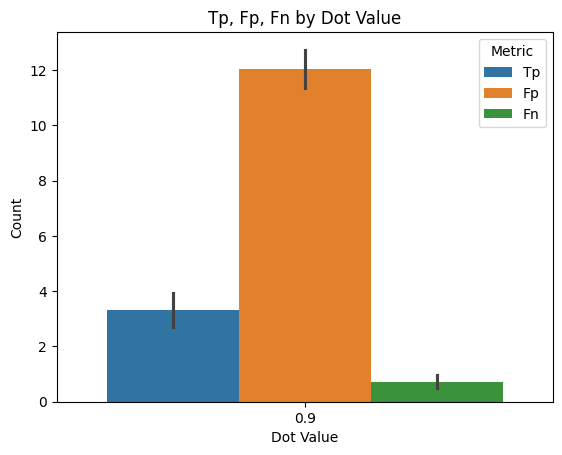

In [18]:
# Verify column names
print(df.columns.tolist())

# Correct the melt function by using the correct id_vars
metrics = df[['dot_value', 'Tp', 'Fp', 'Fn']].melt(
    id_vars=['dot_value'],  # Use 'dot_value' if 'dot_counts' is not intended
    var_name='Metric',
    value_name='Count'
)

# Plot the bar chart
sns.barplot(data=metrics, x='dot_value', y='Count', hue='Metric')
plt.title('Tp, Fp, Fn by Dot Value')
plt.xlabel('Dot Value')
plt.ylabel('Count')
plt.show()


['time', 'dot_value', 'distance_value', 'dot_counts', 'distance_counts', 'model_overall_accuracy', 'precision', 'recall', 'llm_activation_sensitivity', 'llm_interaction_accuracy', 'Tp', 'Fp', 'Fp_out', 'Fp_in', 'Fn', 'Total_ground_truths', 'Total_llm_predictions', 'Total_llm_activations', 'Total_correspondances']


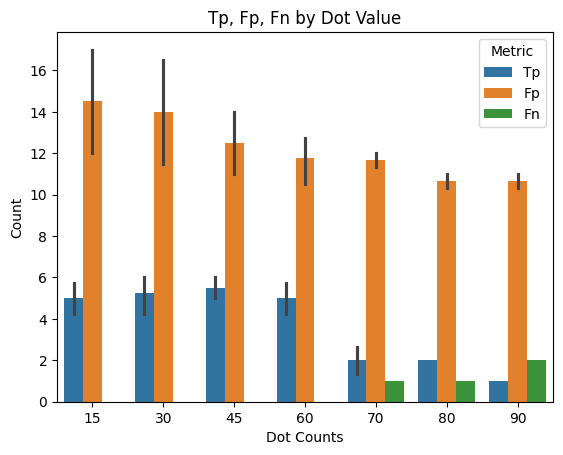

In [19]:
# Verify column names
print(df.columns.tolist())

# Correct the melt function by using the correct id_vars
metrics = df[['dot_counts', 'Tp', 'Fp', 'Fn']].melt(
    id_vars=['dot_counts'],  # Use 'dot_value' if 'dot_counts' is not intended
    var_name='Metric',
    value_name='Count'
)

# Plot the bar chart
sns.barplot(data=metrics, x='dot_counts', y='Count', hue='Metric')
plt.title('Tp, Fp, Fn by Dot Value')
plt.xlabel('Dot Counts')
plt.ylabel('Count')
plt.show()


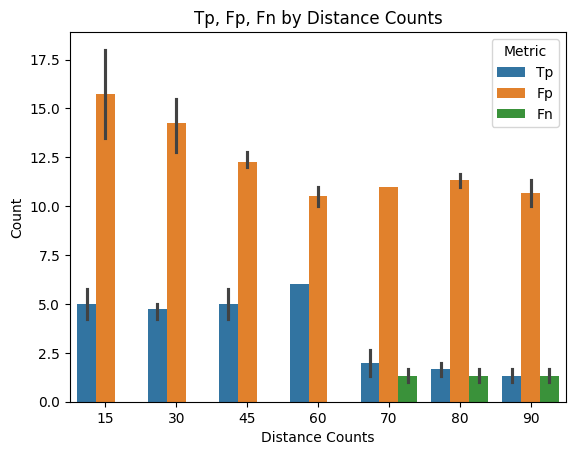

In [20]:
metrics = df[['distance_counts', 'Tp', 'Fp', 'Fn']].melt(
    id_vars=['distance_counts'],
    var_name='Metric',
    value_name='Count'
)

sns.barplot(data=metrics, x='distance_counts', y='Count', hue='Metric')
plt.title('Tp, Fp, Fn by Distance Counts')
plt.xlabel('Distance Counts')
plt.ylabel('Count')
plt.show()


# Scatter Plot with Color Encoding

Scatter Plot of dot_counts vs. distance_counts Colored by Accuracy

*Purpose*: Identify parameter combinations that yield higher accuracy.

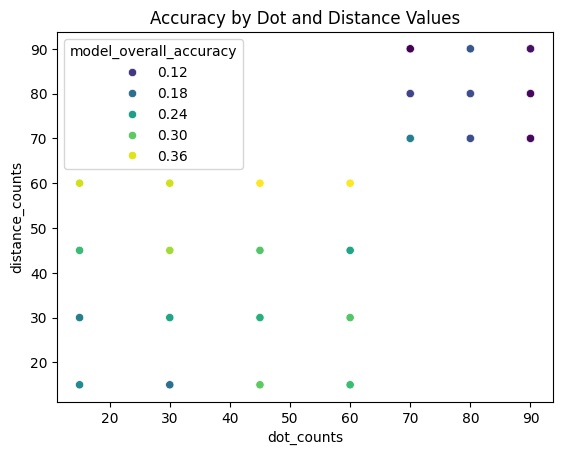

In [148]:
# Scatter Plots with Color Encoding
sns.scatterplot(data=df, x='dot_counts', y='distance_counts', hue='model_overall_accuracy', palette='viridis')
plt.title('Accuracy by Dot and Distance Values')
plt.show()


# Line Plot of LLM Activation Sensitivity and Interaction Accuracy

Plot of llm_activation_sensitivity and llm_interaction_accuracy vs. distance_counts

*Purpose*: Show how the model's sensitivity and interaction accuracy vary with distance_counts.

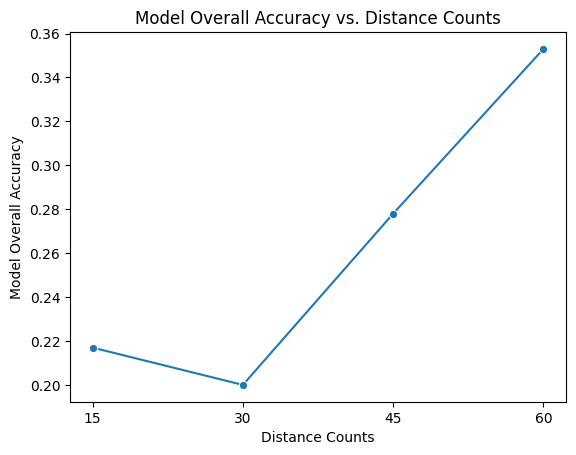

In [124]:
# Filter data for dot_value = 0.9 and dot_counts = 15
df_filtered = df[(df['dot_value'] == 0.9) & (df['dot_counts'] == 15)]

sns.lineplot(
    data=df_filtered,
    x='distance_counts',
    y='model_overall_accuracy',
    marker='o'
)
plt.title('Model Overall Accuracy vs. Distance Counts')
plt.xlabel('Distance Counts')
plt.ylabel('Model Overall Accuracy')
plt.xticks(df_filtered['distance_counts'])
plt.show()


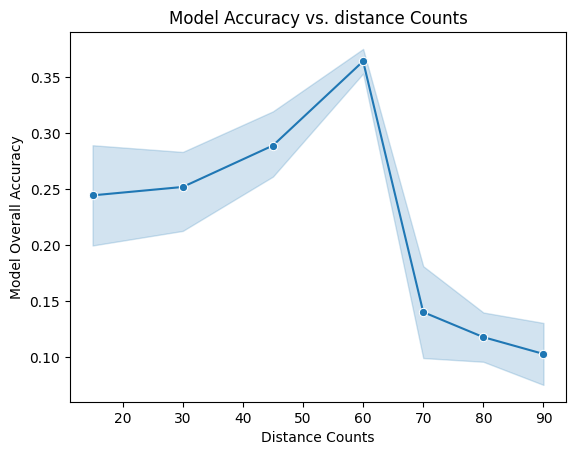

In [153]:
# Line Plots of Performance Metrics vs. Parameter Values
sns.lineplot(data=df, x='distance_counts', y='model_overall_accuracy', marker='o')
plt.title('Model Accuracy vs. distance Counts')
plt.xlabel('Distance Counts')
plt.ylabel('Model Overall Accuracy')
plt.show()

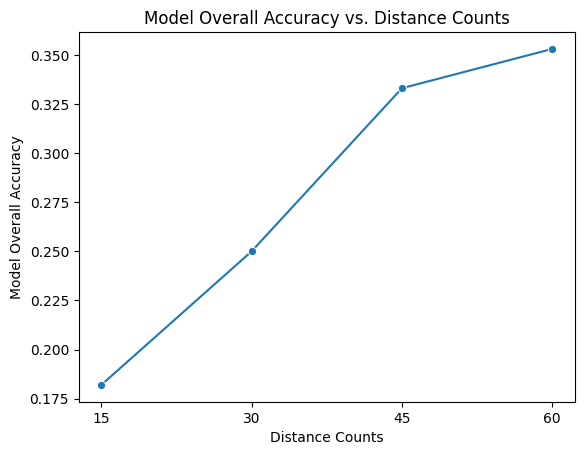

In [125]:
# Filter data for dot_value = 0.9 and dot_counts = 15
df_filtered = df[(df['dot_value'] == 0.9) & (df['dot_counts'] == 30)]

sns.lineplot(
    data=df_filtered,
    x='distance_counts',
    y='model_overall_accuracy',
    marker='o'
)
plt.title('Model Overall Accuracy vs. Distance Counts')
plt.xlabel('Distance Counts')
plt.ylabel('Model Overall Accuracy')
plt.xticks(df_filtered['distance_counts'])
plt.show()


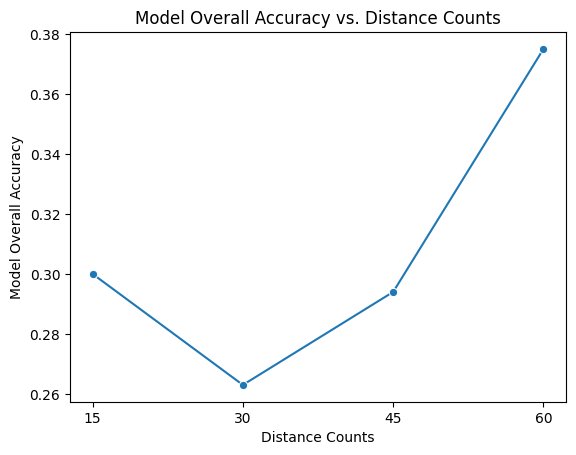

In [126]:
# Filter data for dot_value = 0.9 and dot_counts = 15
df_filtered = df[(df['dot_value'] == 0.9) & (df['dot_counts'] == 45)]

sns.lineplot(
    data=df_filtered,
    x='distance_counts',
    y='model_overall_accuracy',
    marker='o'
)
plt.title('Model Overall Accuracy vs. Distance Counts')
plt.xlabel('Distance Counts')
plt.ylabel('Model Overall Accuracy')
plt.xticks(df_filtered['distance_counts'])
plt.show()


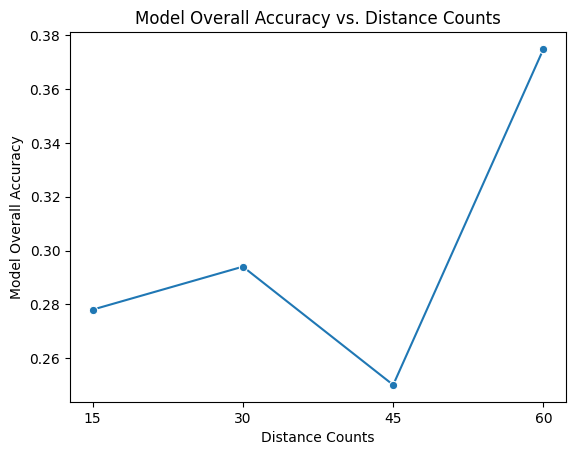

In [55]:
# Filter data for dot_value = 0.9 and dot_counts = 15
df_filtered = df[(df['dot_value'] == 0.9) & (df['dot_counts'] == 60)]

sns.lineplot(
    data=df_filtered,
    x='distance_counts',
    y='model_overall_accuracy',
    marker='o'
)
plt.title('Model Overall Accuracy vs. Distance Counts')
plt.xlabel('Distance Counts')
plt.ylabel('Model Overall Accuracy')
plt.xticks(df_filtered['distance_counts'])
plt.show()


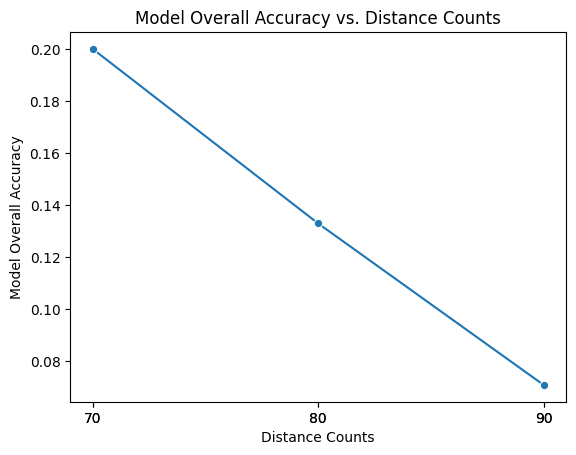

In [56]:
# Filter data for dot_value = 0.9 and dot_counts = 15
df_filtered = df[(df['dot_value'] == 0.9) & (df['dot_counts'] == 70)]

sns.lineplot(
    data=df_filtered,
    x='distance_counts',
    y='model_overall_accuracy',
    marker='o'
)
plt.title('Model Overall Accuracy vs. Distance Counts')
plt.xlabel('Distance Counts')
plt.ylabel('Model Overall Accuracy')
plt.xticks(df_filtered['distance_counts'])
plt.show()


# Line Plots of Performance Metrics vs. Parameter Values

b. Precision and Recall vs. distance_counts

*Purpose*: Display how precision and recall vary with distance_counts.

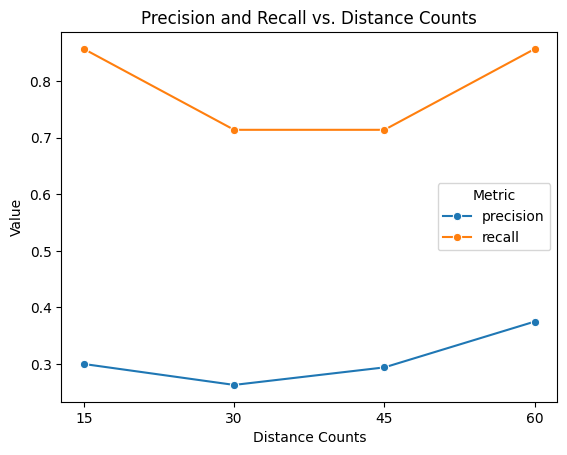

In [129]:
metrics = df_filtered.melt(
    id_vars=['distance_counts'],
    value_vars=['precision', 'recall'],
    var_name='Metric',
    value_name='Value'
)
sns.lineplot(
    data=metrics,
    x='distance_counts',
    y='Value',
    hue='Metric',
    marker='o'
)
plt.title('Precision and Recall vs. Distance Counts')
plt.xlabel('Distance Counts')
plt.ylabel('Value')
plt.xticks(df_filtered['distance_counts'])
plt.show()

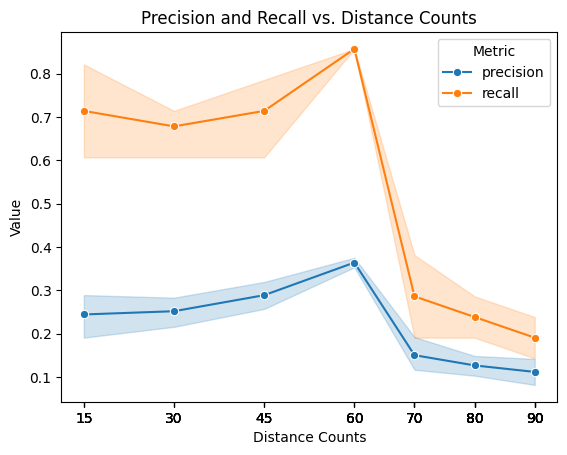

In [130]:
metrics = df.melt(
    id_vars=['distance_counts'],
    value_vars=['precision', 'recall'],
    var_name='Metric',
    value_name='Value'
)
sns.lineplot(
    data=metrics,
    x='distance_counts',
    y='Value',
    hue='Metric',
    marker='o'
)
plt.title('Precision and Recall vs. Distance Counts')
plt.xlabel('Distance Counts')
plt.ylabel('Value')
plt.xticks(df['distance_counts'])
plt.show()

# Line Plots of Performance Metrics vs. Parameter Values

Model Overall Accuracy vs. dot_counts

*Purpose*: Show how changing the dot_counts parameter affects the model_overall_accuracy.

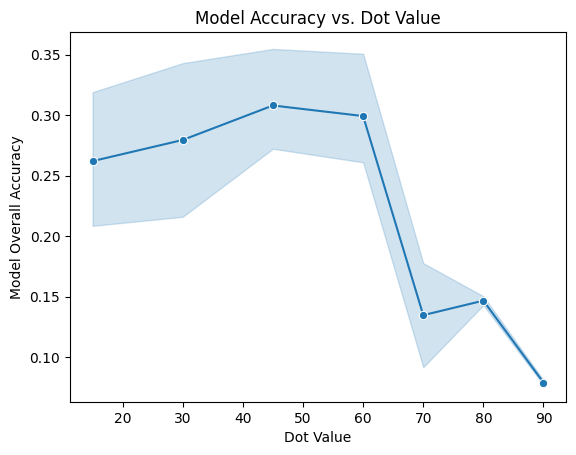

In [154]:
# Line Plots of Performance Metrics vs. Parameter Values
sns.lineplot(data=df, x='dot_counts', y='model_overall_accuracy', marker='o')
plt.title('Model Accuracy vs. Dot Value')
plt.xlabel('Dot Value')
plt.ylabel('Model Overall Accuracy')
plt.show()


# Line Plots of Performance Metrics vs. Parameter Values

Model Overall Accuracy vs. distance_counts

*Purpose*: Show how changing the distance_counts parameter affects the model_overall_accuracy.

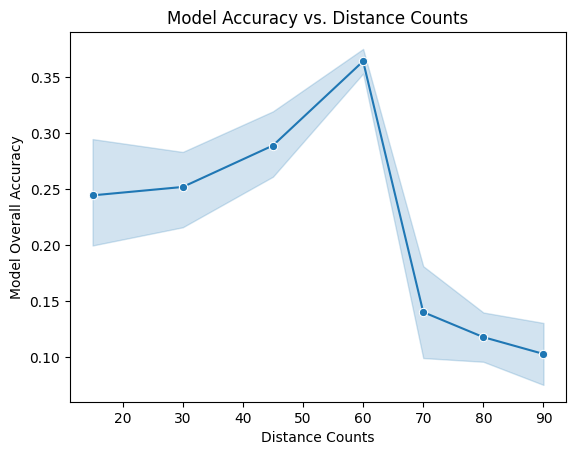

In [156]:
# Line Plots of Performance Metrics vs. Parameter Values
sns.lineplot(data=df, x='distance_counts', y='model_overall_accuracy', marker='o')
plt.title('Model Accuracy vs. Distance Counts')
plt.xlabel('Distance Counts')
plt.ylabel('Model Overall Accuracy')
plt.show()

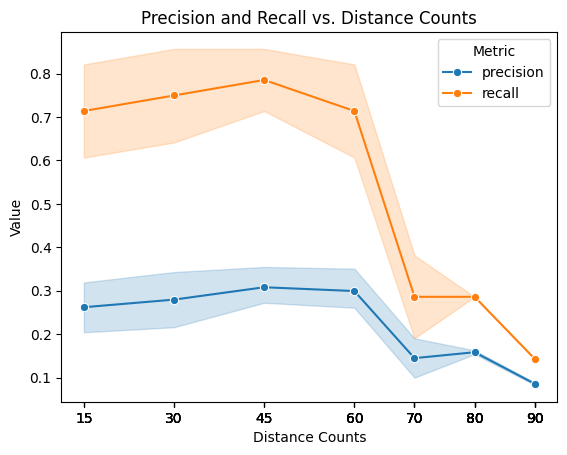

In [132]:
metrics = df.melt(
    id_vars=['dot_counts'],
    value_vars=['precision', 'recall'],
    var_name='Metric',
    value_name='Value'
)
sns.lineplot(
    data=metrics,
    x='dot_counts',
    y='Value',
    hue='Metric',
    marker='o'
)
plt.title('Precision and Recall vs. Distance Counts')
plt.xlabel('Distance Counts')
plt.ylabel('Value')
plt.xticks(df['dot_counts'])
plt.show()

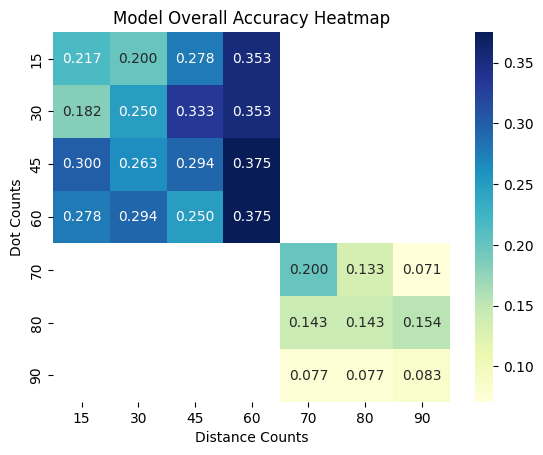

In [62]:
pivot_table = df.pivot_table(
    values='model_overall_accuracy',
    index='dot_counts',
    columns='distance_counts'
)
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap='YlGnBu')
plt.title('Model Overall Accuracy Heatmap')
plt.xlabel('Distance Counts')
plt.ylabel('Dot Counts')
plt.show()


# Scatter Plot with Color Encoding

Scatter Plot of dot_counts vs. distance_counts Colored by Accuracy

*Purpose*: Identify parameter combinations that yield higher accuracy.

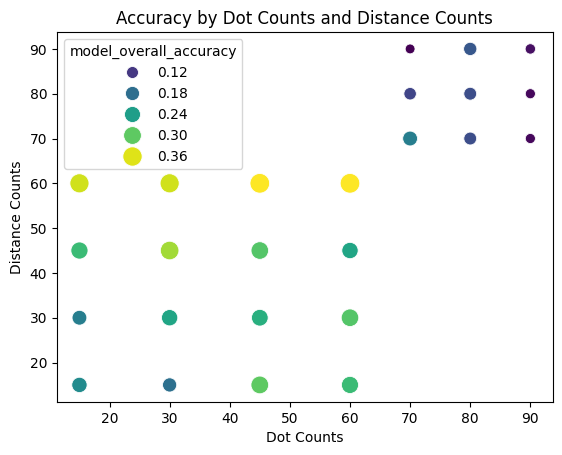

In [63]:
sns.scatterplot(
    data=df,
    x='dot_counts',
    y='distance_counts',
    hue='model_overall_accuracy',
    size='model_overall_accuracy',
    palette='viridis',
    sizes=(50, 200),
    legend='brief'
)
plt.title('Accuracy by Dot Counts and Distance Counts')
plt.xlabel('Dot Counts')
plt.ylabel('Distance Counts')
plt.show()


# Grouped Bar Chart of Tp, Fp, and Fn vs. distance_counts

**Purpose**: Highlight how the counts of true positives, false positives, and false negatives change with `dot_counts`.

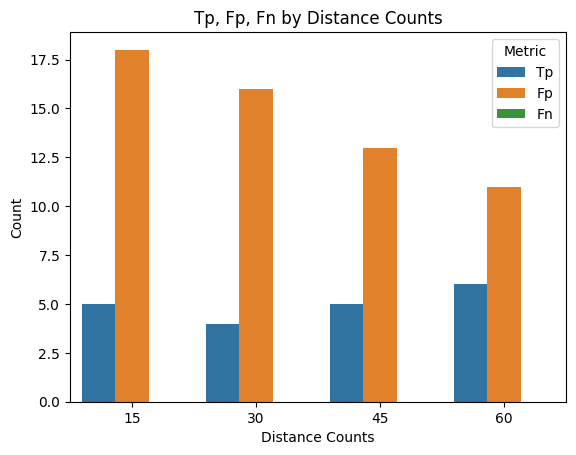

In [64]:
metrics = df_filtered.melt(
    id_vars=['distance_counts'],
    value_vars=['Tp', 'Fp', 'Fn'],
    var_name='Metric',
    value_name='Count'
)
sns.barplot(
    data=metrics,
    x='distance_counts',
    y='Count',
    hue='Metric'
)
plt.title('Tp, Fp, Fn by Distance Counts')
plt.xlabel('Distance Counts')
plt.ylabel('Count')
plt.show()


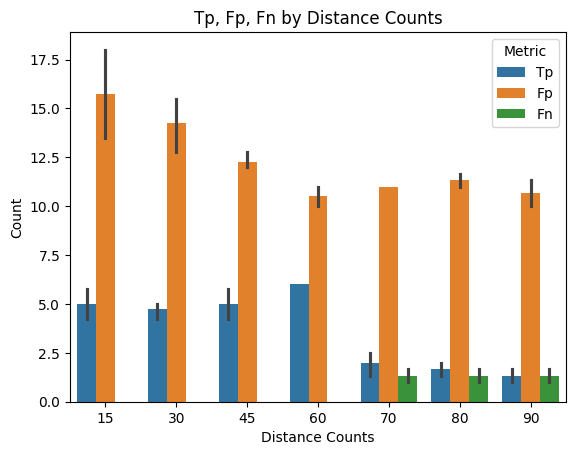

In [74]:
metrics = df.melt(
    id_vars=['distance_counts'],
    value_vars=['Tp', 'Fp', 'Fn'],
    var_name='Metric',
    value_name='Count'
)
sns.barplot(
    data=metrics,
    x='distance_counts',
    y='Count',
    hue='Metric'
)
plt.title('Tp, Fp, Fn by Distance Counts')
plt.xlabel('Distance Counts')
plt.ylabel('Count')
plt.show()


# Grouped Bar Chart of Tp, Fp, and Fn vs. distance_counts

**Purpose**: Highlight how the counts of true positives, false positives, and false negatives change with `dot_counts`.


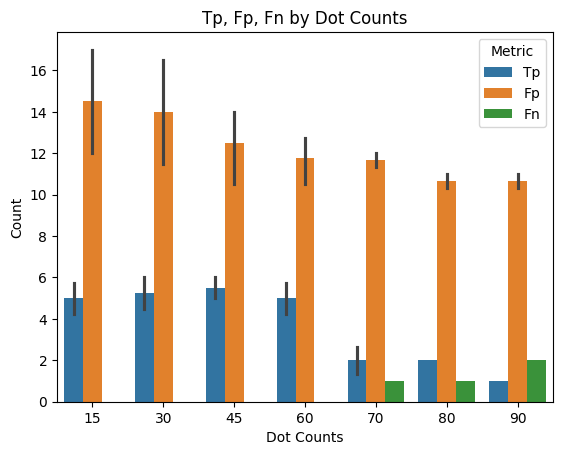

In [160]:
metrics = df.melt(
    id_vars=['dot_counts'],
    value_vars=['Tp', 'Fp', 'Fn'],
    var_name='Metric',
    value_name='Count'
)
sns.barplot(
    data=metrics,
    x='dot_counts',
    y='Count',
    hue='Metric'
)
plt.title('Tp, Fp, Fn by Dot Counts')
plt.xlabel('Dot Counts')
plt.ylabel('Count')
plt.show()


# Line Plot of LLM Activation Sensitivity and Interaction Accuracy

Plot of llm_activation_sensitivity and llm_interaction_accuracy vs. distance_counts

*Purpose*: Show how the model's sensitivity and interaction accuracy vary with distance_counts.


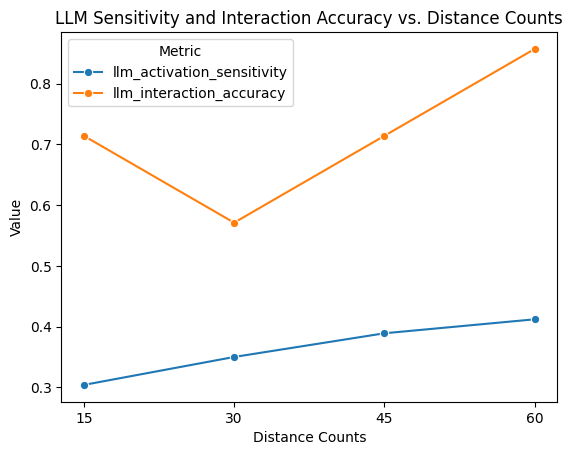

In [78]:
metrics = df_filtered.melt(
    id_vars=['distance_counts'],
    value_vars=['llm_activation_sensitivity', 'llm_interaction_accuracy'],
    var_name='Metric',
    value_name='Value'

)
sns.lineplot(
    data=metrics,
    x='distance_counts',
    y='Value',
    hue='Metric',
    marker='o'
)
plt.title('LLM Sensitivity and Interaction Accuracy vs. Distance Counts')
plt.xlabel('Distance Counts')
plt.ylabel('Value')
plt.xticks(df_filtered['distance_counts'])
plt.show()

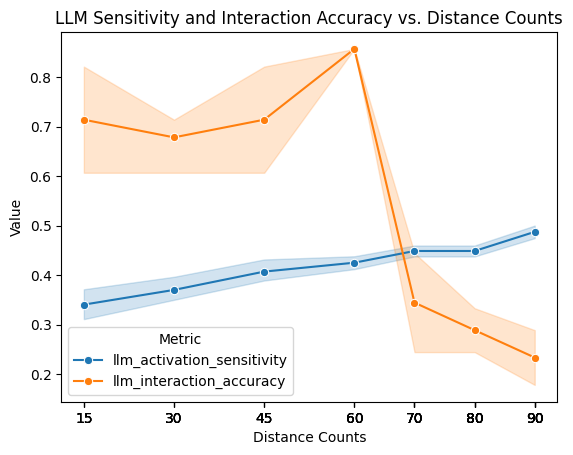

In [80]:
metrics = df.melt(
    id_vars=['distance_counts'],
    value_vars=['llm_activation_sensitivity', 'llm_interaction_accuracy'],
    var_name='Metric',
    value_name='Value'

)
sns.lineplot(
    data=metrics,
    x='distance_counts',
    y='Value',
    hue='Metric',
    marker='o'
)
plt.title('LLM Sensitivity and Interaction Accuracy vs. Distance Counts')m
plt.xlabel('Distance Counts')
plt.ylabel('Value')
plt.xticks(df['distance_counts'])
plt.show()

# ROC Curve (Receiver Operating Characteristic Curve)
*Purpose*: Illustrate the trade-off between true positive rate (sensitivity) and false positive rate.

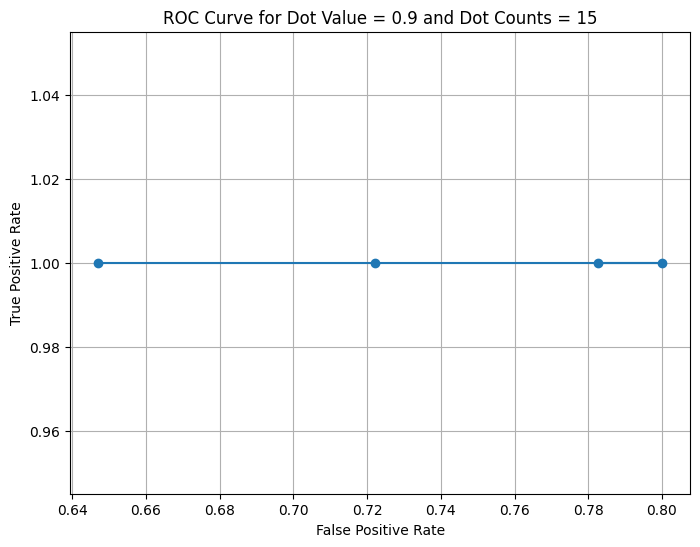

In [48]:
# Filter the DataFrame and create an explicit copy
df_filtered = df[(df['dot_value'] == 0.9) & (df['dot_counts'] == 15)].copy()

# Calculate False Positive Rate (FPR) and True Positive Rate (TPR) using .loc
df_filtered.loc[:, 'FPR'] = df_filtered['Fp'] / (df_filtered['Fp'] + df_filtered['Tp'])
df_filtered.loc[:, 'TPR'] = df_filtered['Tp'] / (df_filtered['Tp'] + df_filtered['Fn'])

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(df_filtered['FPR'], df_filtered['TPR'], marker='o')
plt.title('ROC Curve for Dot Value = 0.9 and Dot Counts = 15')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()


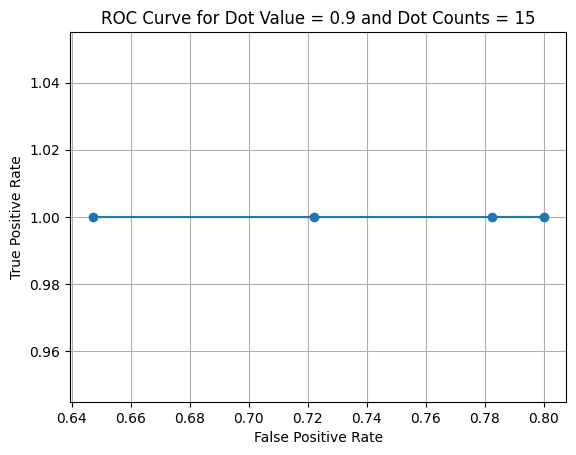

In [49]:
## DIFFERENT WAY BUT SAME RESULT ## 

# Using assign to add new columns
df_filtered = df[(df['dot_value'] == 0.9) & (df['dot_counts'] == 15)].copy()

df_filtered = df_filtered.assign(
    FPR=lambda x: x['Fp'] / (x['Fp'] + x['Tp']),
    TPR=lambda x: x['Tp'] / (x['Tp'] + x['Fn'])
)

# Plot the ROC Curve
plt.plot(df_filtered['FPR'], df_filtered['TPR'], marker='o')
plt.title('ROC Curve for Dot Value = 0.9 and Dot Counts = 15')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

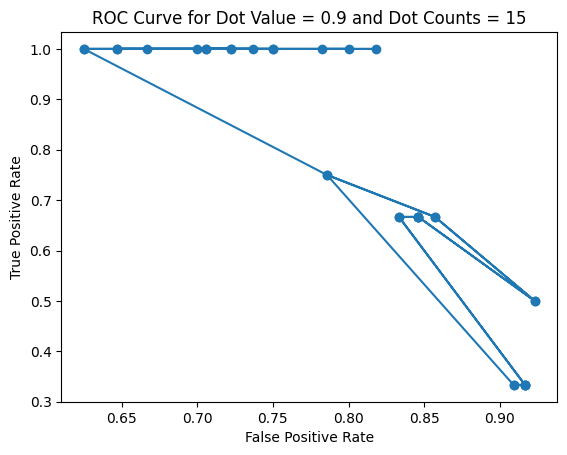

In [133]:
# Calculate False Positive Rate (FPR) and True Positive Rate (TPR)
df['FPR'] = df['Fp'] / (df['Fp'] + df['Tp'])
df['TPR'] = df['Tp'] / (df['Tp'] + df['Fn'])

plt.plot(df['FPR'], df['TPR'], marker='o')
plt.title('ROC Curve for Dot Value = 0.9 and Dot Counts = 15')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Confusion Matrix Visualization
Heatmap of Confusion Matrix Components for a Specific Setting

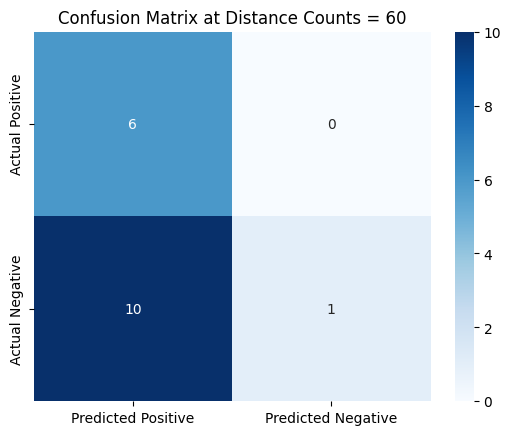

In [135]:
# Select the row corresponding to distance_counts = 60
cm_row = df_filtered[df_filtered['distance_counts'] == 60].iloc[0]

# Construct the confusion matrix
cm = pd.DataFrame({
    'Predicted Positive': [cm_row['Tp'], cm_row['Fp']],
    'Predicted Negative': [cm_row['Fn'], cm_row['Total_ground_truths'] - cm_row['Tp'] - cm_row['Fn']]
}, index=['Actual Positive', 'Actual Negative'])

sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix at Distance Counts = 60')
plt.show()

# Correlation Matrix 

Heatmap of Correlations Between Variables

*Purpose*: Identify which parameters are most strongly associated with performance metrics.

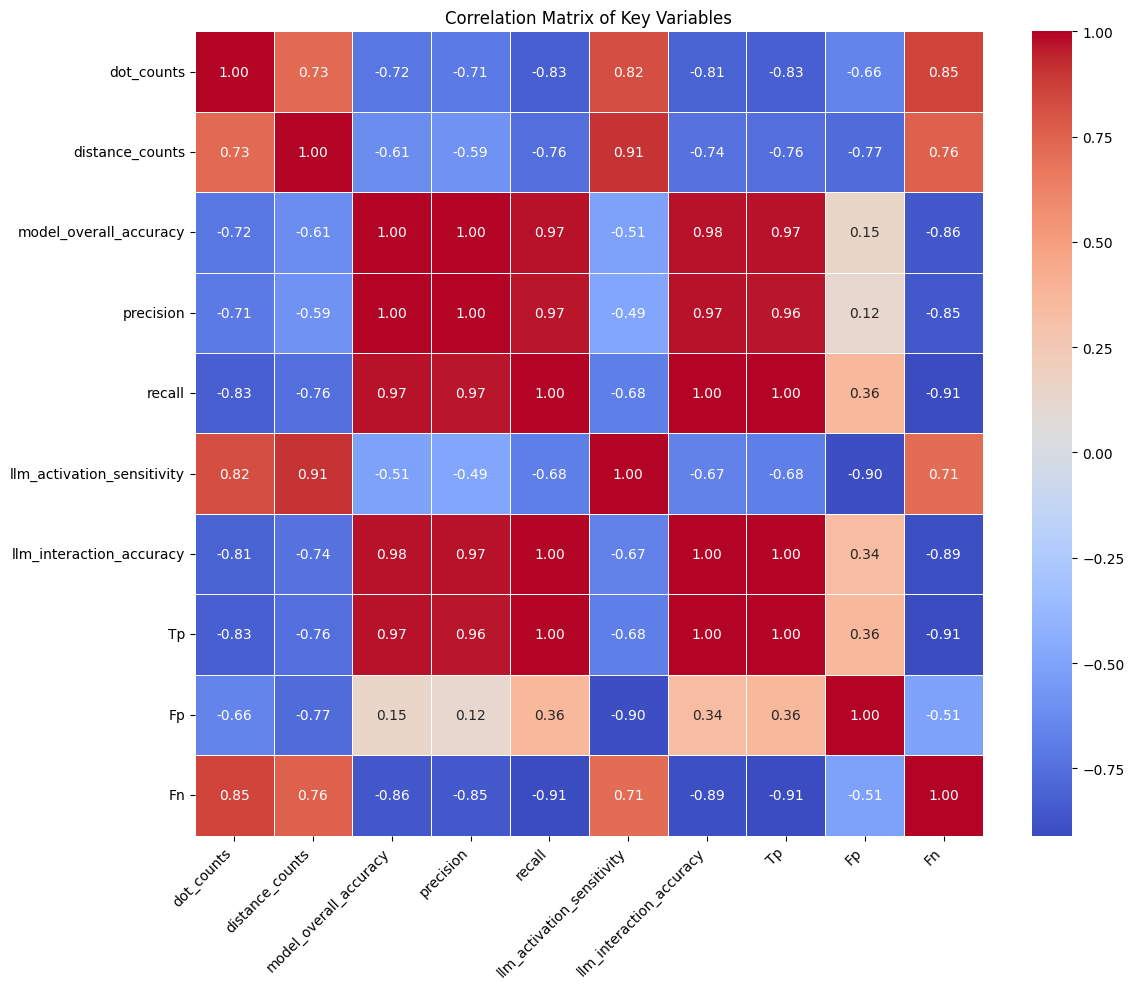

In [145]:
# Assuming 'df' is your DataFrame
# Select relevant columns for correlation
correlation_cols = [
    'dot_counts', 'distance_counts',
    'model_overall_accuracy', 'precision', 'recall',
    'llm_activation_sensitivity', 'llm_interaction_accuracy',
    'Tp', 'Fp', 'Fn'
]

# Compute the correlation matrix
corr_matrix = df[correlation_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap with annotations
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='white'
)

plt.title('Correlation Matrix of Key Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# 3D Surface Plot - 3D Plot of Model Accuracy Over dot_counts and distance_counts

*Purpose*: Provide an intuitive visualization of how accuracy changes over a range of parameter values.


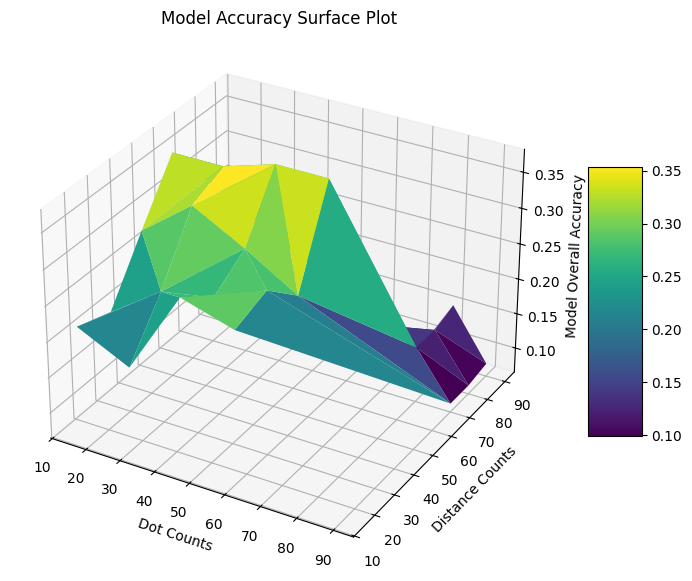

In [158]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

X = df['dot_counts']
Y = df['distance_counts']
Z = df['model_overall_accuracy']

surf = ax.plot_trisurf(X, Y, Z, cmap=cm.viridis, edgecolor='none')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
ax.set_title('Model Accuracy Surface Plot')
ax.set_xlabel('Dot Counts')
ax.set_ylabel('Distance Counts')
ax.set_zlabel('Model Overall Accuracy')
plt.show()

# Histogram of Total LLM Predictions vs. Ground Truths

*Purpose*: Compare the number of predictions made by the model against the ground truth to assess overfitting or underfitting.

df_filtered[['distance_counts', 'Total_llm_predictions', 'Total_ground_truths']].set_index('distance_counts').plot(kind='bar')
plt.title('Total LLM Predictions vs. Ground Truths by Distance Counts')
plt.xlabel('Distance Counts')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


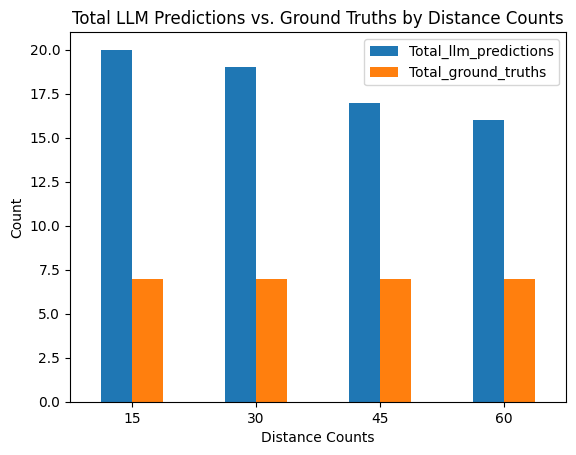

In [157]:
df_filtered[['distance_counts', 'Total_llm_predictions', 'Total_ground_truths']].set_index('distance_counts').plot(kind='bar')
plt.title('Total LLM Predictions vs. Ground Truths by Distance Counts')
plt.xlabel('Distance Counts')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

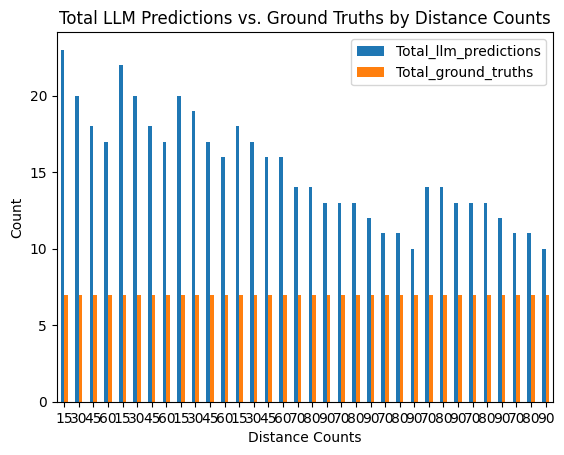

In [140]:
df[['distance_counts', 'Total_llm_predictions', 'Total_ground_truths']].set_index('distance_counts').plot(kind='bar')
plt.title('Total LLM Predictions vs. Ground Truths by Distance Counts')
plt.xlabel('Distance Counts')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

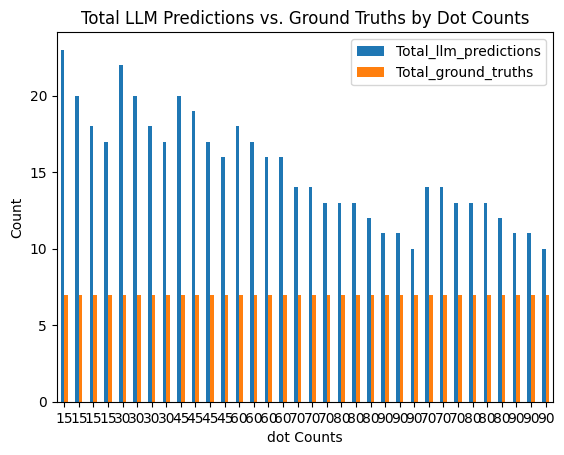

In [142]:
df[['dot_counts', 'Total_llm_predictions', 'Total_ground_truths']].set_index('dot_counts').plot(kind='bar')
plt.title('Total LLM Predictions vs. Ground Truths by Dot Counts')
plt.xlabel('dot Counts')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


# Additional Visualization: LLM Activation Sensitivity vs. Interaction Accuracy

*Purpose*: Analyze the relationship between LLM activation sensitivity and interaction accuracy.

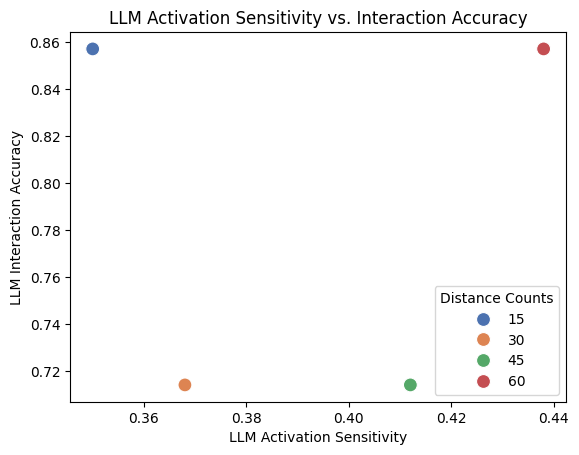

In [143]:
sns.scatterplot(
    data=df_filtered,
    x='llm_activation_sensitivity',
    y='llm_interaction_accuracy',
    hue='distance_counts',
    palette='deep',
    marker='o',
    s=100
)
plt.title('LLM Activation Sensitivity vs. Interaction Accuracy')
plt.xlabel('LLM Activation Sensitivity')
plt.ylabel('LLM Interaction Accuracy')
plt.legend(title='Distance Counts')
plt.show()

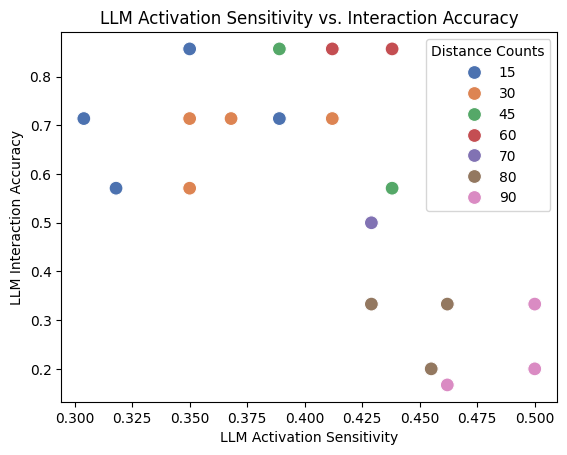

In [144]:
sns.scatterplot(
    data=df,
    x='llm_activation_sensitivity',
    y='llm_interaction_accuracy',
    hue='distance_counts',
    palette='deep',
    marker='o',
    s=100
)
plt.title('LLM Activation Sensitivity vs. Interaction Accuracy')
plt.xlabel('LLM Activation Sensitivity')
plt.ylabel('LLM Interaction Accuracy')
plt.legend(title='Distance Counts')
plt.show()
